In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.salinity.nc')
plotvar = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
lont = lont[290:370,1134]
latt = latt[290:370,1134]
plotvar = plotvar[:,290:370,1134]
#plotvar[plotvar == '--'] = np.nan

In [4]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0125-07.z_w_top.nc')
A = data1.variables['z_w_top'][:]/100

In [5]:
data2=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.PD.nc')
PD = data2.variables['PD'][0,:,:]

In [6]:
PD = PD[:,290:370,1134]
PD = (PD-1)*1000

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [7]:
#A = np.arange(62)
#B = np.arange(80)
B= latt
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
#####################################################################
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,70,100,130,170,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#nice_levels = [34.20,34.30,34.40,34.50,34.60,34.65,34.68,34.70]

nice_levels = [34.40,34.42,34.45,34.50,34.55,34.60,34.65,34.68,34.70]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


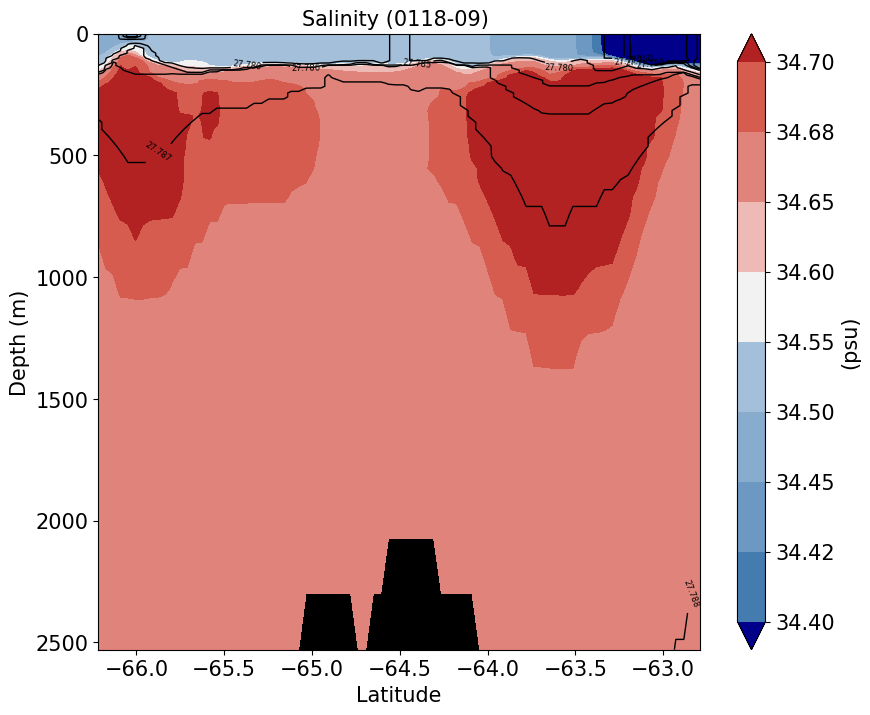

In [8]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:49,:], yy[:49,:], plotvar[:49,:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("black")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
CS = ax0.contour(xx[:49,:], yy[:49,:], PD[:49,:],[27.74,27.75,27.76,27.77,27.78,27.785,27.786,27.787,27.788],colors = 'black', linestyles = 'solid',linewidths=1)
plt.clabel(CS, fontsize=6)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('(psu)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
#plt.xticks(range(0,120,20), ['66.2$^\circ$S', '65.3$^\circ$S', '64.5$^\circ$S','63.6$^\circ$S','62.8$^\circ$S'])
#plt.yticks(range(0,61,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968','3133','4375','5625'])
plt.yticks(**my_font)
plt.xticks(**my_font)
plt.xlabel('Latitude',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (0118-09) ',**my_font)
plt.savefig("salt118-09.png")